# Es 7.1

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

def ave(vett,tau):
    accu=0
    for i in range(tau):
        accu=accu+vett[i]     
    return accu/tau

def aveprod(vett, tau):
    accu=0
    for i in range(tau):
        accu=accu+vett[i]*vett[-i+tau]
    return accu/tau

def autocorr(vett,tau):
    m=ave(vett,tau)
    mm=aveprod(vett,tau)
    return mm-m*m   

def err(errors,data,L):
    M=len(data)
    for i in range(len(L)):
        N=int(M/L[i])
        ave = np.zeros(N)
        av2 = np.zeros(N)
        sum_prog = 0
        su2_prog = 0
    
        for l in range(N):
            sum = 0
            for j in range(L[i]):
                k = j+l*L[i]
                sum += data[k]
            ave[l] = sum/L[i]       # r_i 
            av2[l] = (ave[l])**2 # (r_i)^2 

        for k in range(N):
            sum_prog += ave[k] # SUM_{j=0,i} r_j
            su2_prog += av2[k] # SUM_{j=0,i} (r_j)^2
        sum_prog/= N # Cumulative average
        su2_prog/= N # Cumulative square average
        errors[i] = error(sum_prog,su2_prog,N) # Statistical uncertainty
    pass

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV**2)/n)
    

def norm(vett,tau):
    accu=0
    m=ave(vett,tau)
    for i in range(tau):
        accu+=(m-vett[i])**2
    return accu/tau

### Gas

Autocorrelazione

<ipython-input-26-baabe688a636>:6: RuntimeWarning: divide by zero encountered in double_scalars
  ac=[autocorr(epot,i+1)/norm(epot,i+1) for i in range(len(epot)-4000)]
<ipython-input-26-baabe688a636>:15: RuntimeWarning: divide by zero encountered in double_scalars
  ac1=[autocorr(pres,i+1)/norm(pres,i+1) for i in range(len(pres)-4000)]


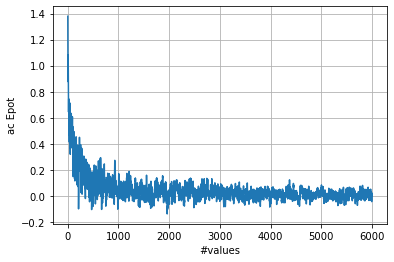

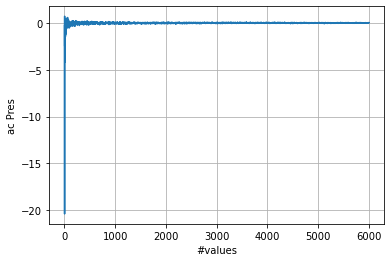

In [26]:
epot = np.loadtxt("EPot_Ist_gas.o",usecols=1)
pres = np.loadtxt("Pres_Ist_gas.o",usecols=1)


#norm=autocorr(epot,1)
ac=[autocorr(epot,i+1)/norm(epot,i+1) for i in range(len(epot)-4000)]

plt.plot(ac)
plt.xlabel('#values')
plt.ylabel('ac Epot')
plt.grid('true')
plt.figure()

#norm1=autocorr(pres,1)
ac1=[autocorr(pres,i+1)/norm(pres,i+1) for i in range(len(pres)-4000)]

plt.plot(ac1)
plt.xlabel('#values')
plt.ylabel('ac Pres')
plt.grid('true')
plt.show()


Incertezza statistica

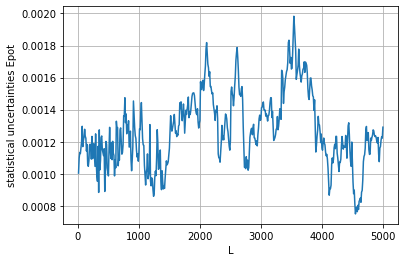

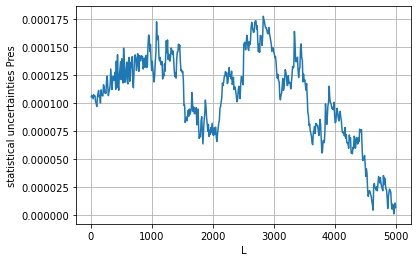

In [27]:
L=[l for l in range(10,5010,10)]
M=len(epot)

err_prog = np.zeros(len(L))

err(err_prog,epot,L)

plt.plot(L,err_prog)
plt.xlabel('L')
plt.ylabel('statistical uncertainties Epot')
plt.grid(True)
plt.figure()

err(err_prog,pres,L)

plt.plot(L,err_prog)
plt.xlabel('L')
plt.ylabel('statistical uncertainties Pres')
plt.grid(True)
plt.show()
    

### Liquid

<ipython-input-28-7c44849b836d>:7: RuntimeWarning: divide by zero encountered in double_scalars
  ac=[autocorr(epot,i+1)/norm(epot,i+1) for i in range(len(epot)-1)]
<ipython-input-28-7c44849b836d>:16: RuntimeWarning: divide by zero encountered in double_scalars
  ac1=[autocorr(pres,i+1)/norm(pres,i+1) for i in range(len(pres)-1)]


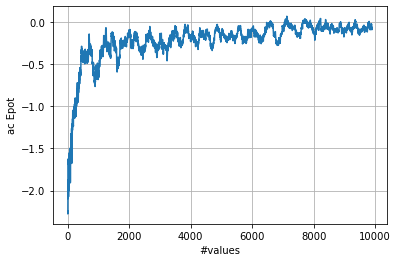

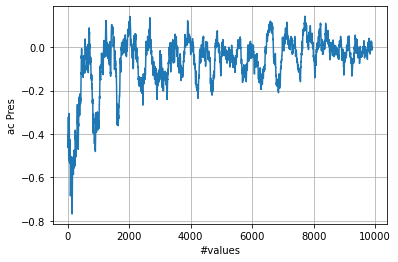

In [28]:
epot = np.loadtxt("EPot_Ist_liquid.o",usecols=1)
pres = np.loadtxt("Pres_Ist_liquid.o",usecols=1)



#norm=autocorr(epot,1)
ac=[autocorr(epot,i+1)/norm(epot,i+1) for i in range(len(epot)-1)]

plt.plot(ac[100:])
plt.xlabel('#values')
plt.ylabel('ac Epot')
plt.grid('true')
plt.figure()

#norm1=autocorr(pres,0)
ac1=[autocorr(pres,i+1)/norm(pres,i+1) for i in range(len(pres)-1)]

plt.plot(ac1[100:])
plt.xlabel('#values')
plt.ylabel('ac Pres')
plt.grid('true')
plt.show()


Incertezza statistica

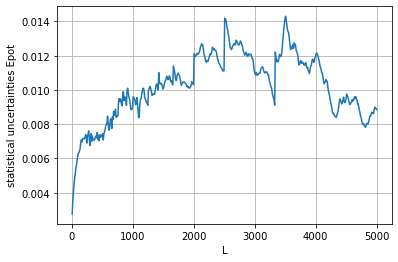

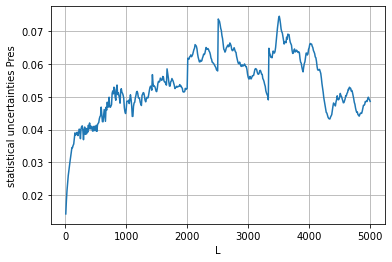

In [29]:
L=[l for l in range(10,5010,10)]
M=len(epot)

err(err_prog,epot,L)

plt.plot(L,err_prog)
plt.xlabel('L')
plt.ylabel('statistical uncertainties Epot')
plt.grid(True)
plt.figure()

err(err_prog,pres,L)

plt.plot(L,err_prog)
plt.xlabel('L')
plt.ylabel('statistical uncertainties Pres')
plt.grid(True)
plt.show()
    

### Solid

20199


<ipython-input-3-a29f935228c6>:7: RuntimeWarning: divide by zero encountered in double_scalars
  ac=[autocorr(epot,i+1)/norm(epot,i+1) for i in range(len(epot)-4000)]
<ipython-input-3-a29f935228c6>:16: RuntimeWarning: divide by zero encountered in double_scalars
  ac1=[autocorr(pres,i+1)/norm(pres,i+1) for i in range(len(pres)-4000)]


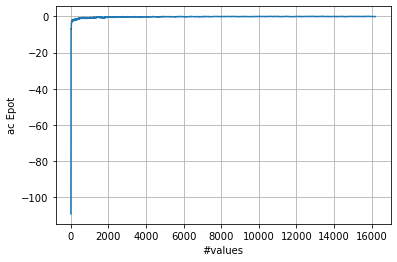

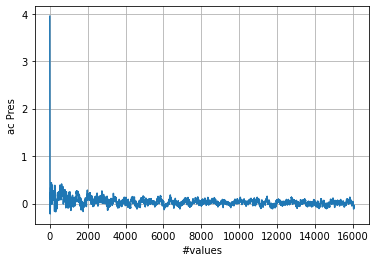

-inf


In [3]:
epot = np.loadtxt("EPot_Ist_solid.o",usecols=1)
pres = np.loadtxt("Pres_Ist_solid.o",usecols=1)

print(len(epot))

#norm=autocorr(epotl,0)
ac=[autocorr(epot,i+1)/norm(epot,i+1) for i in range(len(epot)-4000)]

plt.plot(ac)
plt.xlabel('#values')
plt.ylabel('ac Epot')
plt.grid('true')
plt.figure()

#norm1=autocorr(presl,0)
ac1=[autocorr(pres,i+1)/norm(pres,i+1) for i in range(len(pres)-4000)]

plt.plot(ac1)
plt.xlabel('#values')
plt.ylabel('ac Pres')
plt.grid('true')
plt.show()

print(ac[0])

Incertezza statistica

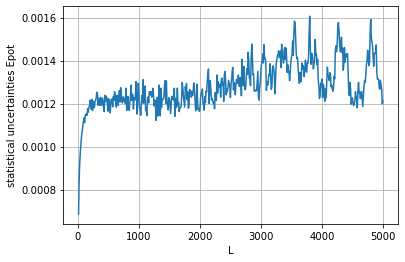

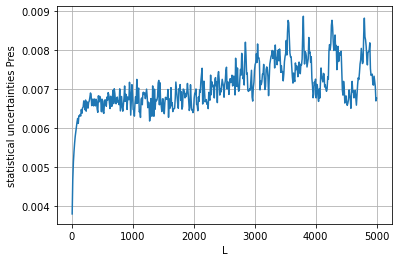

In [6]:
L=[l for l in range(10,5010,10)]
M=len(epot)

err_prog = np.zeros(len(L))
err(err_prog,epot,L)

plt.plot(L,err_prog)
plt.xlabel('L')
plt.ylabel('statistical uncertainties Epot')
plt.grid(True)
plt.figure()

err(err_prog,pres,L)

plt.plot(L,err_prog)
plt.xlabel('L')
plt.ylabel('statistical uncertainties Pres')
plt.grid(True)
plt.show()

Ritengo che 2000 passi per blocco sia una dimensione appropriata, osservando come decresce l'autocorrelazione